In [1]:
import numpy as np
from AdaptiveDEigenSolve import *
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True, linewidth=100, threshold=100)
%matplotlib inline

Solve 1D PDE for compact functions on an compact domain:

Iteration 0:	0.993690	0.983058
Mean Error: 	-3.457996

Iteration 1:	0.999826	0.998685
Mean Error: 	-4.245874

Iteration 2:	0.999997	0.999913
Mean Error: 	-5.322989

Iteration 3:	1.000000	0.999994
Mean Error: 	-6.373762

Iteration 4:	1.000000	0.999993
Mean Error: 	-6.134727

Iteration 5:	1.000000	0.999997
Mean Error: 	-6.357335

Eigenvalue:  1.0


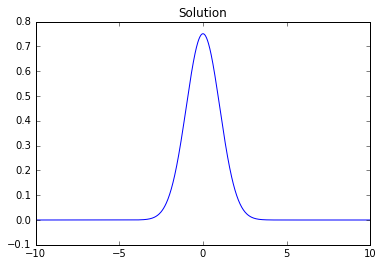

In [2]:
# Define an operator, should operate on a function space:
L = lambda phi: phi.BC( -phi.D(2) + phi.F(lambda x: x**2) )

# Call the adaptive solver:
w, vr, vi = adaptiveSolver(L, l=-25, u=25, sigma=1.0, verbose=True, tol=1e-6)

# Print the eigenvalue and plot the eigenfunction:
print 'Eigenvalue: ', round(w, 3)

x = np.linspace(-10, 10, 1000)
plt.title('Solution')
plt.plot(x, vr(x))
plt.show()

Iteration 0:	98.999928	98.993606
Mean Error: 	-4.667745

Iteration 1:	98.999999	98.999756
Mean Error: 	-6.174333

Iteration 2:	99.000000	99.000032
Mean Error: 	-6.469050

Iteration 3:	99.000000	98.999828
Mean Error: 	-6.383163

Iteration 4:	99.000000	98.999779
Mean Error: 	-6.268092

Iteration 5:	99.000000	98.999774
Mean Error: 	-6.228553

Iteration 6:	99.000000	98.999769
Mean Error: 	-6.262177

Iteration 7:	99.000000	98.999769
Mean Error: 	-6.280265

Iteration 8:	99.000000	98.999769
Mean Error: 	-6.285503

Eigenvalue:  99.0


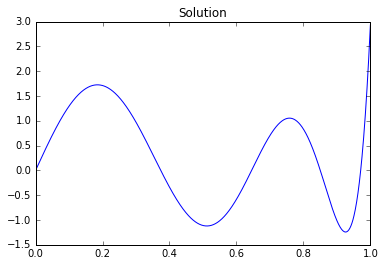

In [3]:
# Define an operator, should operate on a function space:
def L(phi):
    Lop  = phi.F(lambda x: x**2 - 1        ) * phi.D(2)
    Lop += phi.F(lambda x: (3*x) - (1.0/x) ) * phi.D(1)
    Lop += phi.F(lambda x: 1.0 / (x**2)    ) * phi.I()
    return phi.BC(Lop, right=None)

# Call the adaptive solver:
w, vr, vi = adaptiveSolver(L, l=1e-25, u=1.0, sigma=100.0, verbose=True, tol=1e-6)

# Print the eigenvalue and plot the eigenfunction:
print 'Eigenvalue: ', round(w, 3)

x = np.linspace(0.0, 1.0, 1000)
plt.title('Solution')
plt.plot(x, vr(x))
plt.show()